# Handwritten Digit Project

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### First implement KNN Algorithm

In [55]:
def Euclidean_dist(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def KNN(x_train,y_train,tst_pnt,k=5):
    dist=[]
    
    #1first find the distance of tst point from every point that is available in x_train
    for point,label in zip(x_train,y_train):
        distance=Euclidean_dist(tst_pnt,point)
        dist.append((distance,label))
        
    #2 now sorted the distance to find the nearest datapoint
    dist=sorted(dist,key=lambda e:e[0])
    
    #3Now find k nearest neighbour
    k_near_neigh=np.array(dist[:k])#Here array of row=k,col=2 size
    
    #4Now Find Max Freq of label which is present in dist
    unq=np.unique(k_near_neigh[:,1],return_counts=True)
    label,cnt=unq #tuple unpacking
    pred=label[np.argmax(cnt)]
    return pred

#### Prediction Function

In [7]:
def Get_Prediction(x_train,y_train,x_test,k=5):
    prediction=[]
    
    for point in x_test:
        pred=KNN(x_train,y_train,point,k)
        prediction.append(pred)
        
    return np.array(prediction)

##### Calculate Accuracy

In [8]:
def Accuracy(Prediction,y_test):
    return (np.sum(Prediction==y_test))/y_test.shape[0]

### Apply KNN On Dataset MNIST

In [33]:
DataPoint=pd.read_csv(r"E:\CodingBlock\Machine learning\ML_Pun\MNIST_Using KNN\train.csv.csv")  #here r is use for ignore backslash

In [34]:
DataPoint.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
DataPoint.shape

(59999, 785)

In [57]:
dataset=DataPoint.values[:4000]
X,Y=dataset[:,1:],dataset[:,0]
print(X.shape,Y.shape)

(4000, 784) (4000,)


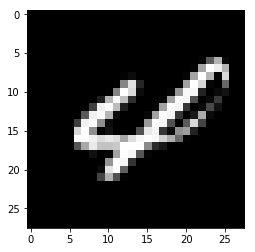

In [58]:
#Lets Plt image of One Label
image=X[530]
image=image.reshape(28,28)
plt.figure()
plt.imshow(image,cmap="gray")

#### Lets Prepare Train And Test Dataset

In [59]:
split=(int)(0.8*X.shape[0])
x_train,x_test=X[:split],X[split:]
y_train,y_test=Y[:split],Y[split:]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3200, 784) (3200,) (800, 784) (800,)


#### Apply Our Train Data on Knn And Find Predictions And plot Atleast 5 image

In [60]:
prediction=Get_Prediction(x_train,y_train,x_test,k=5)
print(Accuracy(prediction,y_test))

0.9225


In [61]:
Test_datapoint=pd.read_csv(r"E:\CodingBlock\Machine learning\ML_Pun\MNIST_Using KNN\train.csv.csv")

In [62]:
Test_datapoint.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
z=10 #no of point to test
test=Test_datapoint.values
p,q=test[:z,1:],test[:z,0]
p.shape

(10, 784)

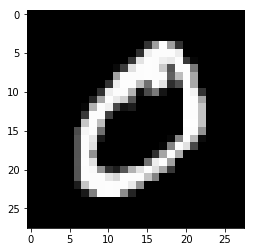

Label :: 0.0


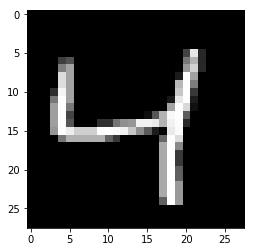

Label :: 4.0


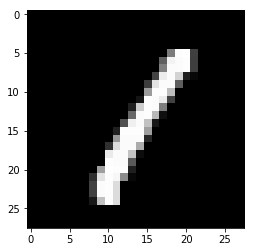

Label :: 1.0


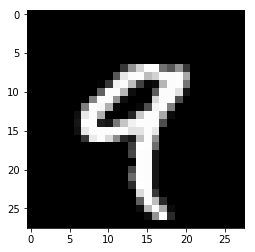

Label :: 9.0


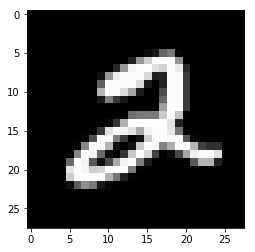

Label :: 2.0


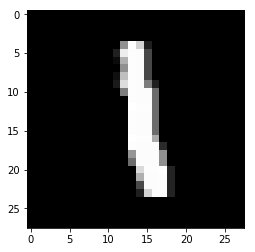

Label :: 1.0


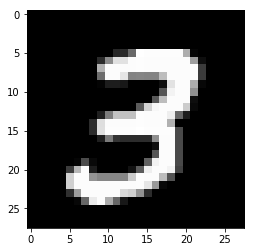

Label :: 3.0


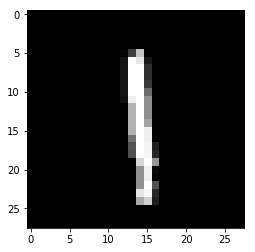

Label :: 1.0


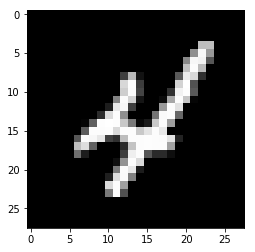

Label :: 4.0


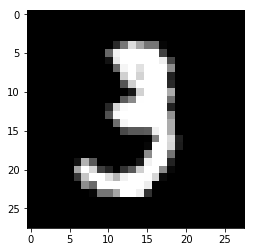

Label :: 3.0


In [75]:
for testpoint in p:
    im_point=testpoint.reshape(28,28)
    plt.figure()
    plt.imshow(im_point,cmap="gray")
    plt.show()
    print("Label ::",KNN(x_test,y_test,testpoint))

### Find Prediction

In [79]:
pre=Get_Prediction(x_train,y_train,x_test)

In [81]:
print(pre)

[3. 9. 4. 0. 5. 7. 6. 2. 7. 7. 8. 1. 0. 7. 3. 5. 4. 4. 5. 3. 6. 4. 7. 2.
 8. 1. 9. 7. 6. 1. 0. 9. 3. 1. 4. 7. 1. 9. 4. 4. 0. 2. 8. 0. 6. 7. 0. 0.
 7. 7. 8. 7. 7. 3. 7. 9. 9. 3. 0. 4. 4. 0. 9. 3. 9. 5. 9. 1. 0. 7. 5. 1.
 1. 2. 5. 7. 9. 4. 8. 4. 8. 7. 7. 9. 5. 0. 6. 6. 1. 4. 3. 7. 8. 6. 1. 9.
 6. 7. 8. 2. 5. 9. 9. 2. 2. 1. 2. 1. 0. 9. 9. 4. 2. 5. 4. 9. 7. 3. 3. 3.
 1. 9. 3. 7. 6. 5. 6. 0. 2. 6. 1. 3. 2. 4. 6. 3. 0. 8. 2. 4. 2. 2. 7. 1.
 1. 7. 3. 9. 7. 1. 4. 4. 8. 4. 9. 5. 2. 1. 9. 4. 5. 2. 6. 6. 8. 6. 0. 7.
 0. 4. 9. 7. 1. 3. 1. 0. 0. 5. 1. 1. 2. 9. 2. 5. 5. 3. 6. 4. 9. 2. 0. 0.
 1. 1. 2. 0. 3. 9. 4. 3. 5. 3. 6. 3. 7. 1. 1. 7. 0. 0. 1. 1. 2. 9. 3. 5.
 4. 1. 5. 8. 6. 3. 7. 3. 8. 7. 1. 7. 0. 1. 1. 1. 5. 0. 3. 4. 9. 1. 4. 1.
 0. 7. 0. 2. 6. 8. 9. 7. 6. 4. 6. 3. 5. 6. 4. 1. 1. 4. 4. 3. 0. 3. 7. 1.
 9. 3. 5. 1. 7. 2. 3. 3. 1. 6. 4. 8. 4. 1. 0. 8. 9. 8. 9. 9. 6. 1. 1. 1.
 8. 0. 3. 0. 8. 4. 8. 4. 8. 7. 8. 5. 8. 8. 4. 4. 7. 9. 7. 4. 1. 1. 9. 8.
 8. 0. 7. 0. 8. 7. 9. 6. 3. 7. 3. 0. 5. 8. 5. 9. 0.

### MNSIT Accuracy implementation from knearestNeignbourAlgorithm

In [80]:
Accuracy(pre,y_test)

0.9225